# Linear Regression Assignment : Bike Sharing

This assignment is a programming assignment wherein you have to build a multiple linear regression model for the prediction of demand for shared bikes.

## Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

## Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## Step 1: Reading and Understanding the Data

- Importing the necessary libraries
- Reading the dataset
- Shape of the dataset
- Checking missing values in the dataset
- Description of the dataset

In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [187]:
%matplotlib inline
warnings.filterwarnings("ignore")

In [188]:
df = pd.read_csv("day.csv")

In [189]:
df.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        1           1   
1        2  02-01-2018       1   0     1        0        2           1   
2        3  03-01-2018       1   0     1        0        3           1   
3        4  04-01-2018       1   0     1        0        4           1   
4        5  05-01-2018       1   0     1        0        5           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [190]:
df.shape

(730, 16)

-- There are 730 rows and 16 columns

In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


-- There is no missing values in the dataset

In [192]:
df.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.995890   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.000339   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.690411    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.462641    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

## Step 1: Visualising the Data

- Making pairplots for numeric and categorical variables


In [193]:
df.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        1           1   
1        2  02-01-2018       1   0     1        0        2           1   
2        3  03-01-2018       1   0     1        0        3           1   
3        4  04-01-2018       1   0     1        0        4           1   
4        5  05-01-2018       1   0     1        0        5           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

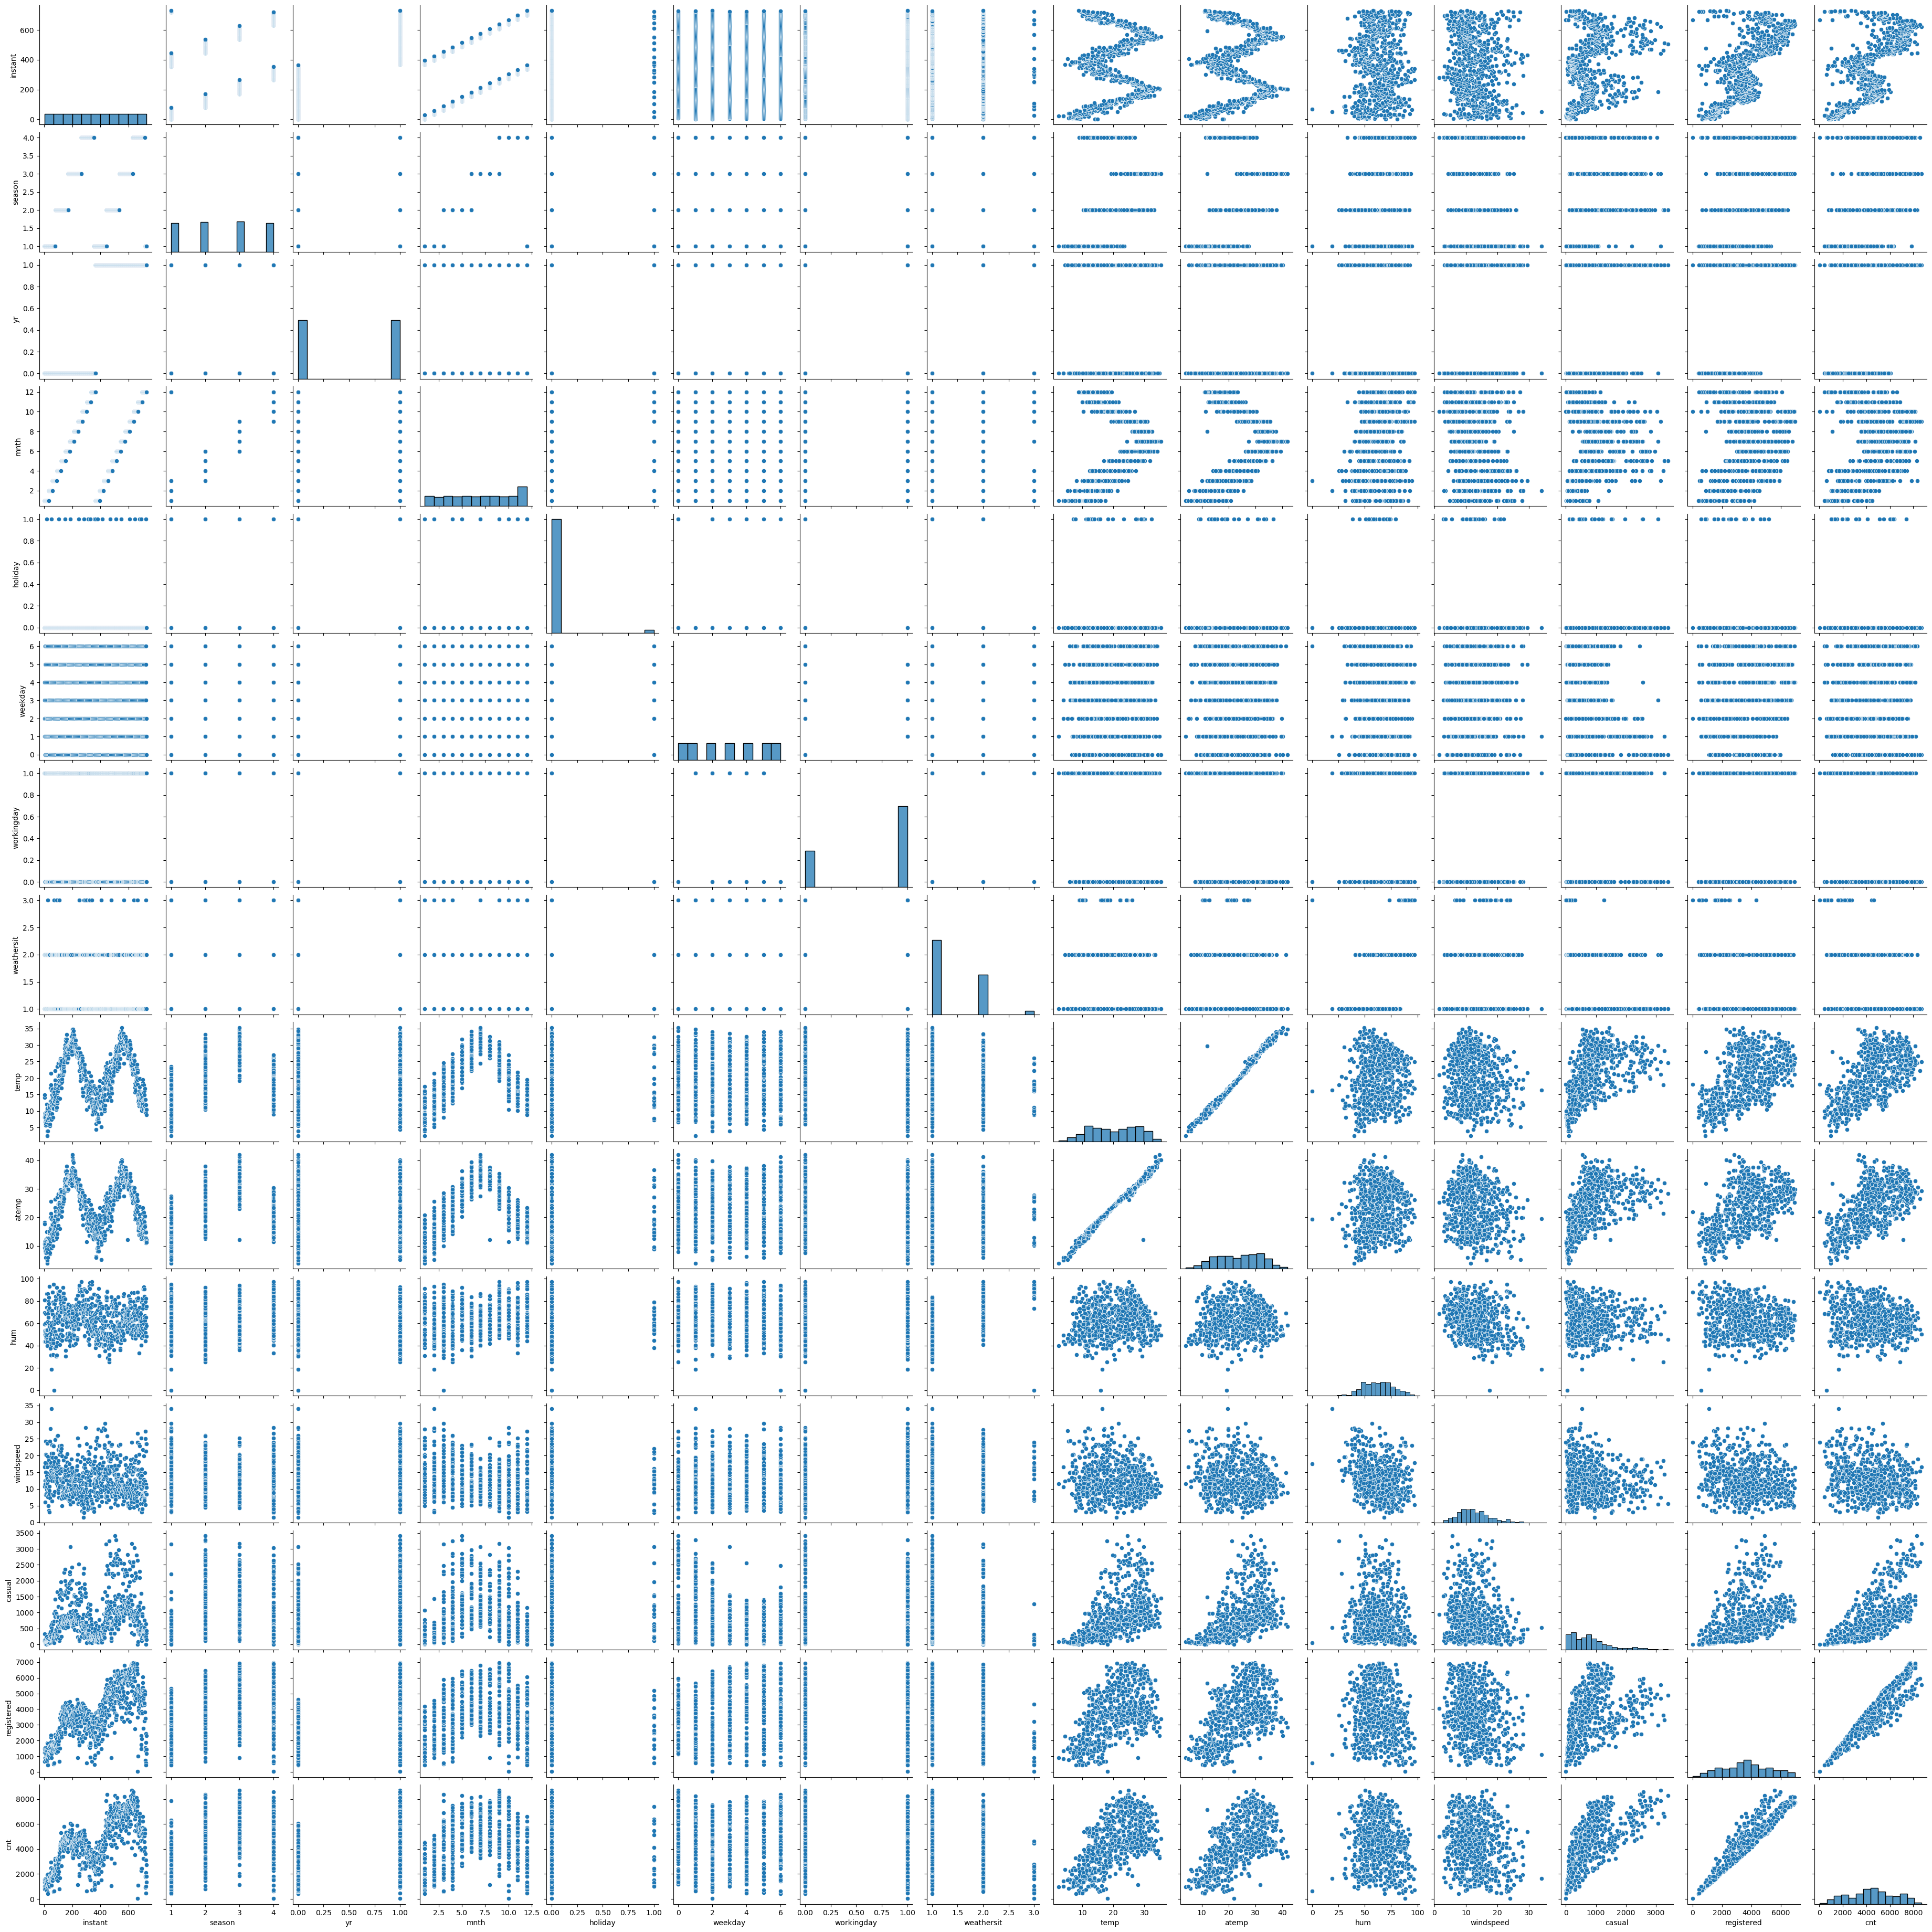

In [194]:
sns.pairplot(df)
plt.show()

#### Numerical variable pairplot

In [195]:
vars_n = ['cnt', 'temp', 'atemp', 'hum','windspeed']

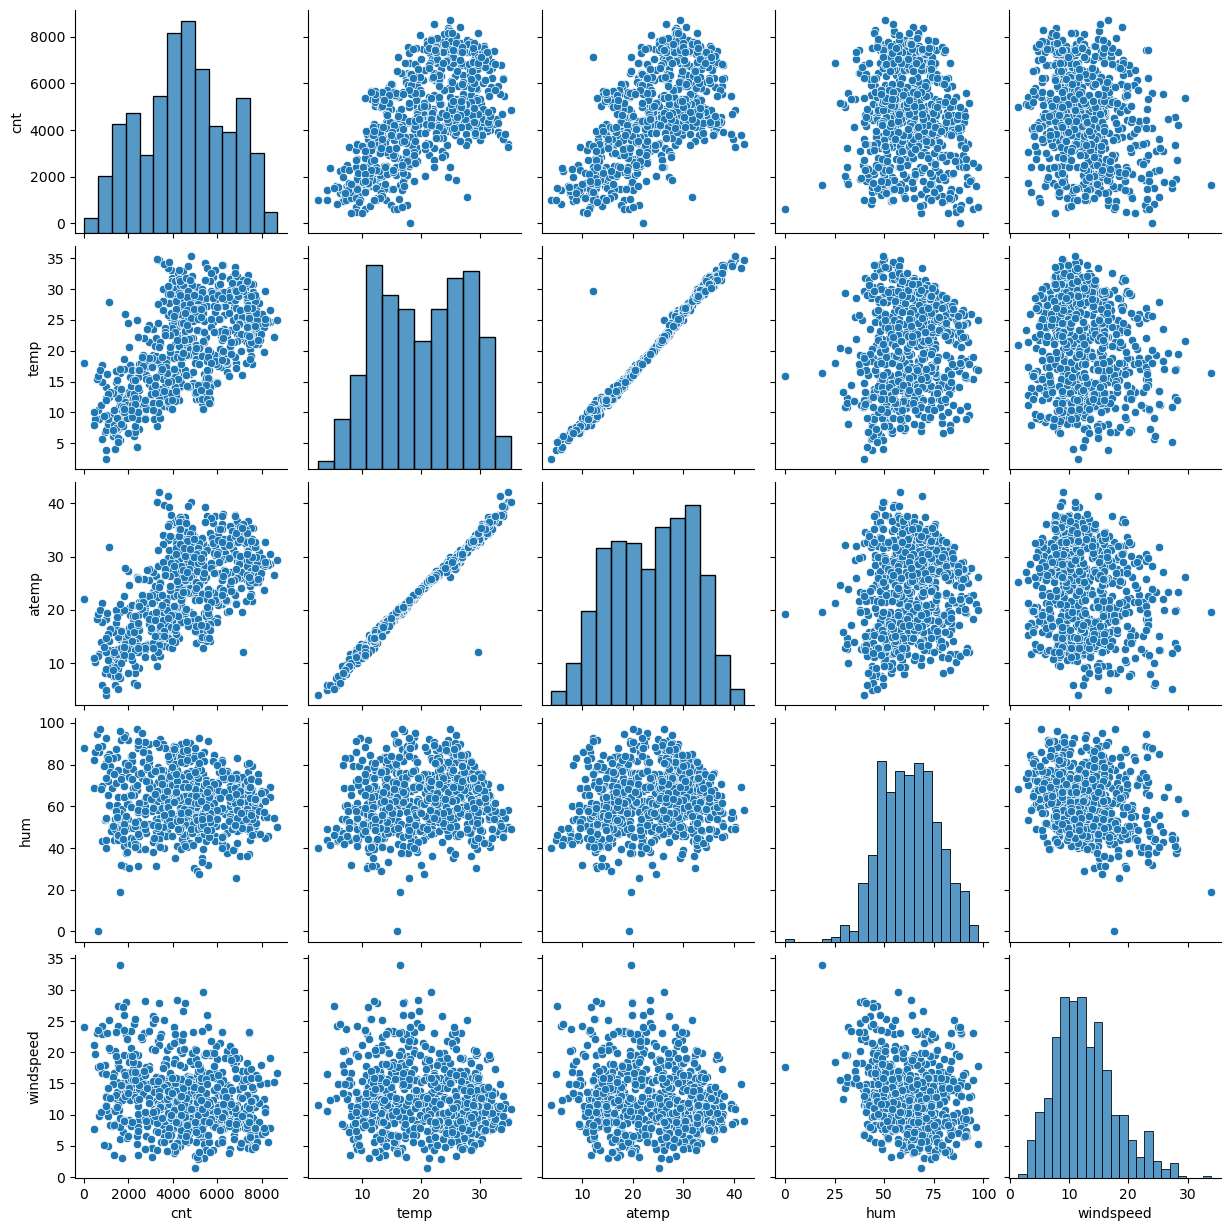

In [196]:
sns.pairplot(data=df,vars=vars_n)
plt.show()

--`cnt` variable seem to have a linear relationship with `atemp` and `temp` variables
<br>
-- A strong linear relationship can be spotted between independent variables `atemp` and `temp` which can lead to multicollinearity affecting our model

#### Categorical variable pairplot

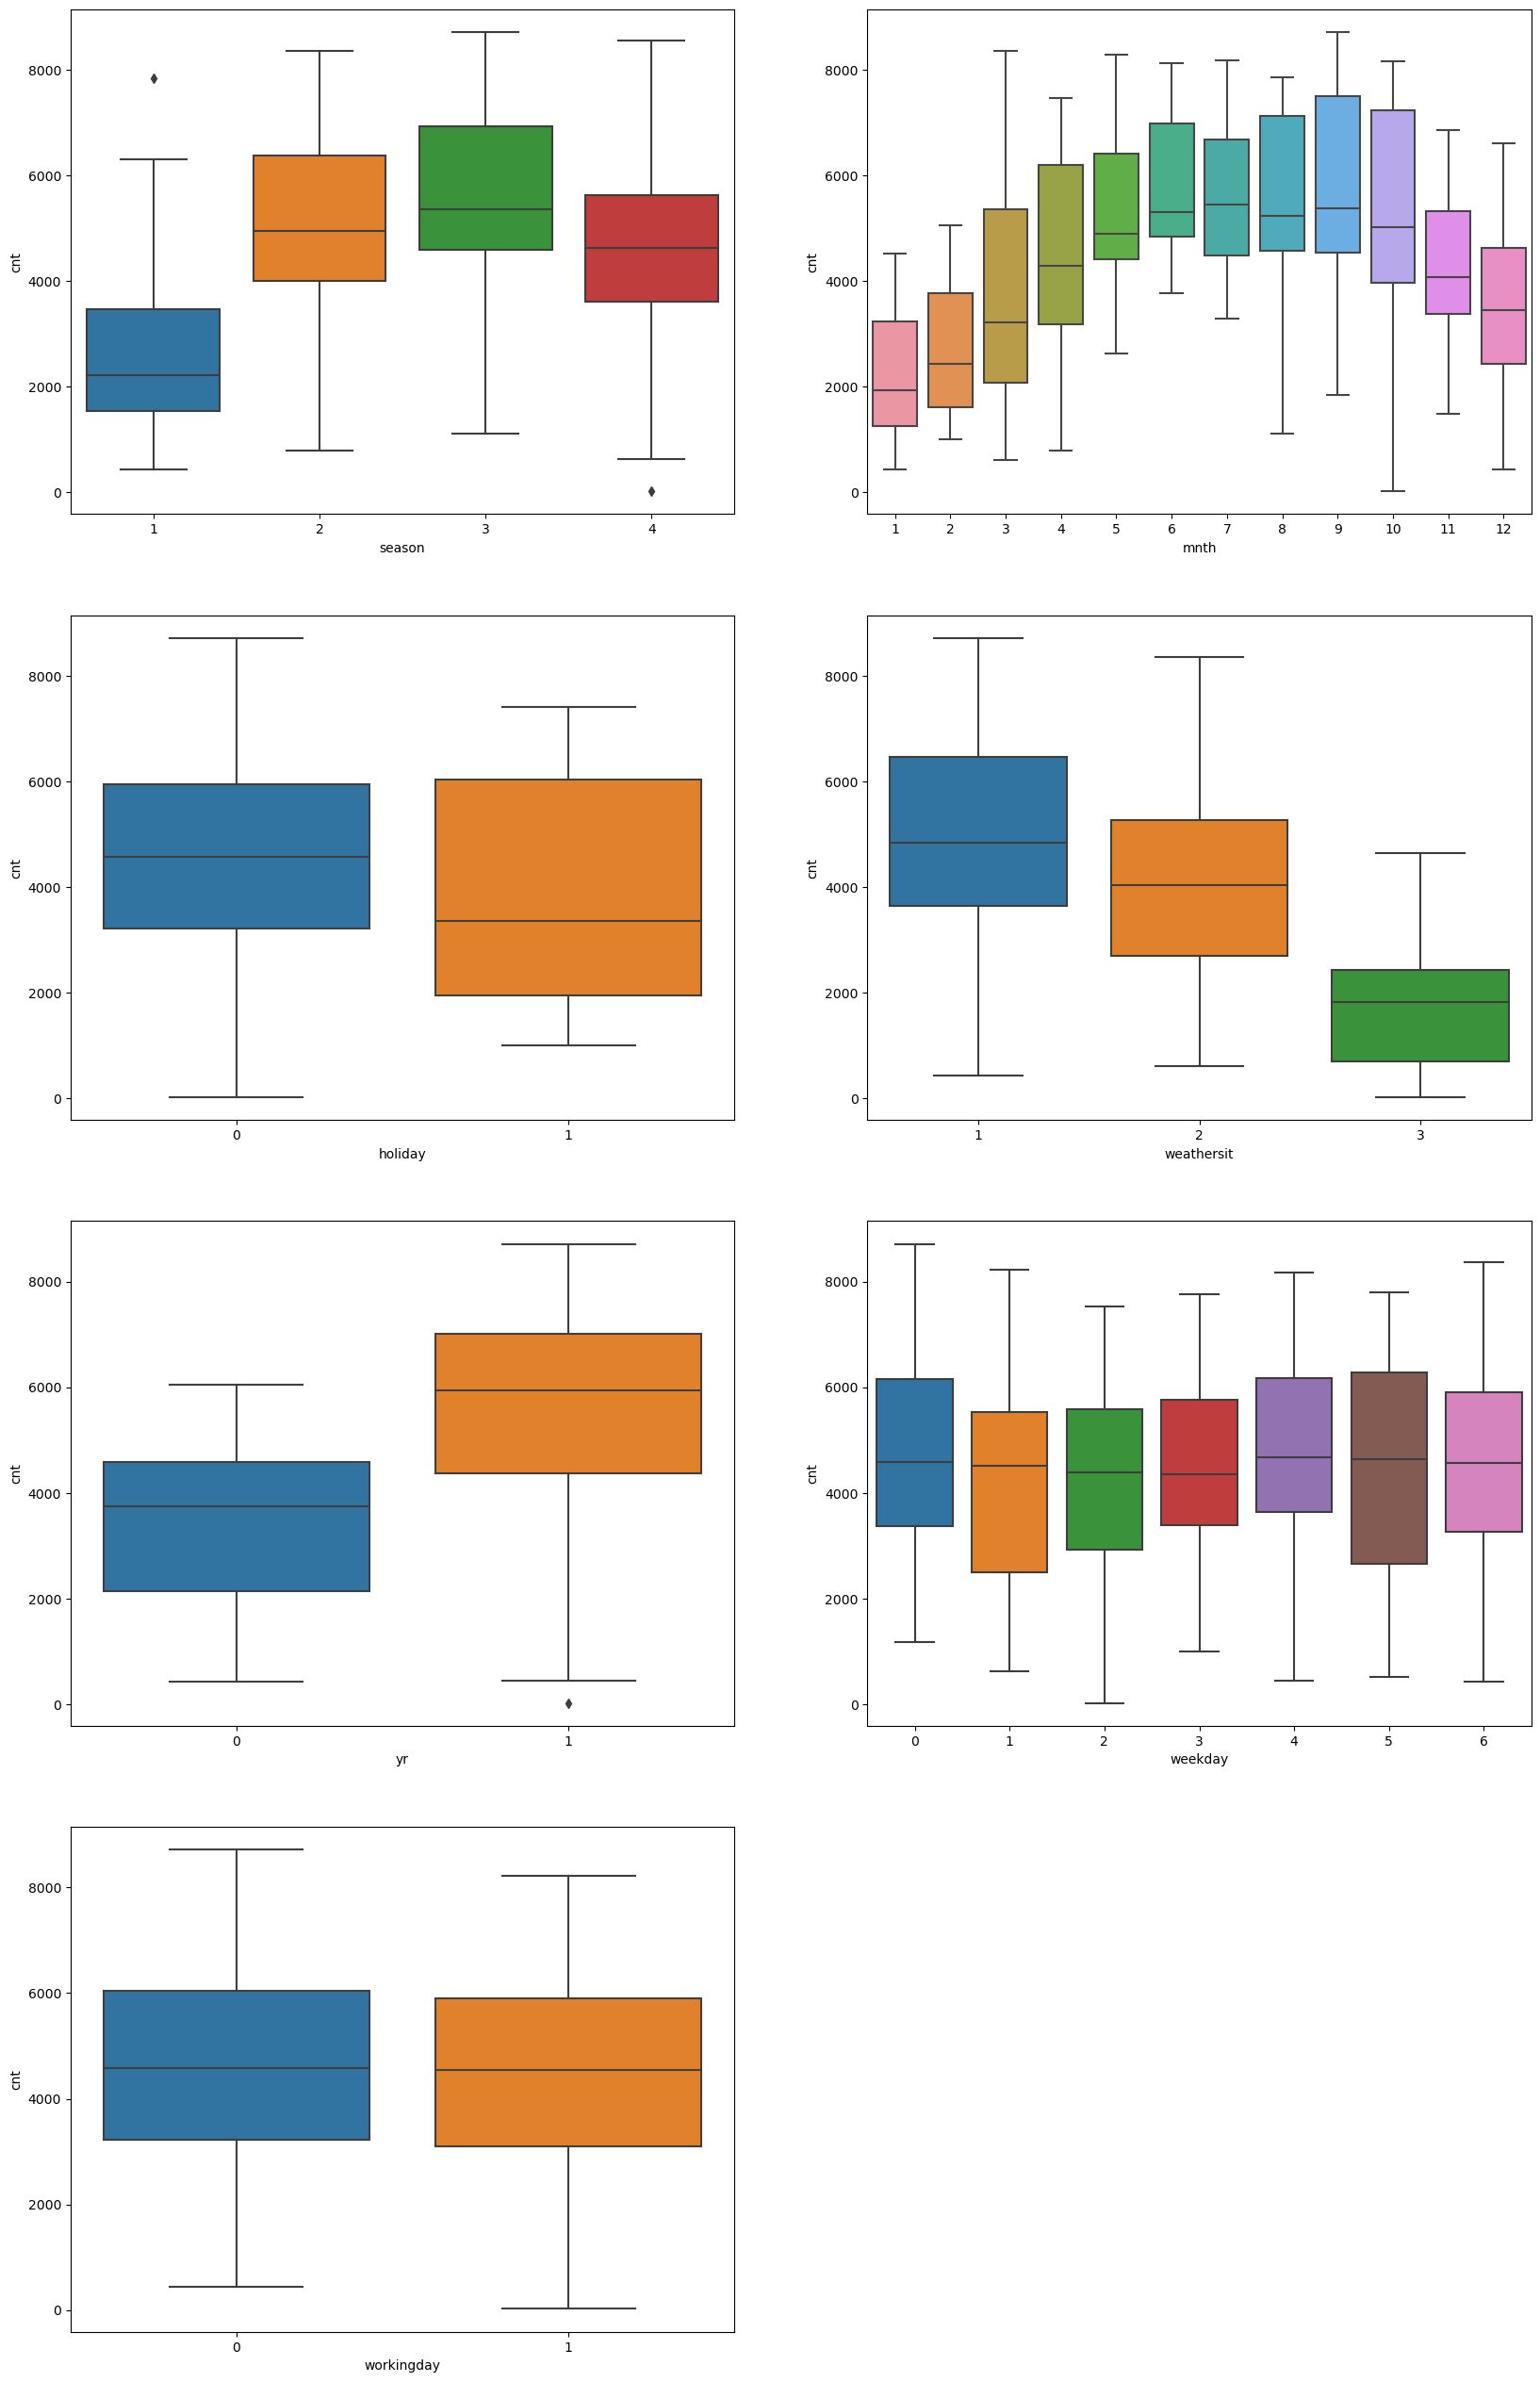

In [197]:
plt.figure(figsize=(20, 32))
plt.subplot(4,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(4,2,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(4,2,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(4,2,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(4,2,5)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.subplot(4,2,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(4,2,7)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.show()

### Inference 

Plot 1

- Spring (`1`) is the season that has the lowest count and  for bikes shared amongst all seasons
- Fall (`3`) has the highest median count followed by Summer (`2`) and Winter (`4`) followed by Spring (`1`) with the lowest.

Plot 2 

- We can see a rise in the count during summer months
- January (`1`) and February (`2`) are the months when the least number of shared bikes were used

Plot 3

- The bike sharing count for Holidays (`1`) are lower as compared to non-Holidays (`0`)

Plot 4

- There were no bikes shared when the weather situation was like (`4`) 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'

Plot 5

- The bike sharing count and the median value increased significantly in 2019 (`1`) as compared to 2018 (`0`)

Plot 6

- The median values for all the days in the week are very similar

Plot 7

- The plots are almost same for working days and non-working days
- Though the median values are almost same , the maximum and minimum number of Bike sharing on Non-working days (`0`) are slightly higher than Working days (`0`)

## Step 3 : Data Preparation

- Dropping irrelevant columns
- Replacing the numeric values in the categorical columns with their respective specified values
- Creating Dummy Variables

#### Dropping irrelevant columns

In [198]:
df.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        1           1   
1        2  02-01-2018       1   0     1        0        2           1   
2        3  03-01-2018       1   0     1        0        3           1   
3        4  04-01-2018       1   0     1        0        4           1   
4        5  05-01-2018       1   0     1        0        5           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [199]:
df.drop(["instant", "dteday", "casual", "registered"], axis=1, inplace=True)

In [200]:
df.head()

season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0     1        0        1           1           2  14.110847   
1       1   0     1        0        2           1           2  14.902598   
2       1   0     1        0        3           1           1   8.050924   
3       1   0     1        0        4           1           1   8.200000   
4       1   0     1        0        5           1           1   9.305237   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600

To extract the month name from numbers specified in `mnth` column, we need to use `calendar` library

In [201]:
import calendar

In [202]:
df["mnth"] = df["mnth"].apply(lambda x: calendar.month_abbr[x])

In [203]:
df.head()

season  yr mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0  Jan        0        1           1           2  14.110847   
1       1   0  Jan        0        2           1           2  14.902598   
2       1   0  Jan        0        3           1           1   8.050924   
3       1   0  Jan        0        4           1           1   8.200000   
4       1   0  Jan        0        5           1           1   9.305237   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600

#### Replacing numbers of Seasons column with their respective specified names 

In [204]:
df["season"] = df["season"].map({1:"spring", 2:"summer", 3:"fall", 4:"winter"})

#### Replacing numbers of Weekday column with their respective specified names 

In [205]:
df["weekday"] = df["weekday"].map({0:"Sunday",1:"Monday",
                                   2:"Tuesday",3:"Wednesday",
                                   4:"Thrusday",5:"Friday",
                                   6:"Saturday"})

#### Replacing numbers of Weather Situation column with their respective specified names 

In [206]:
df["weathersit"] = df["weathersit"].map({1:'Clear',2:'Mist & Cloudy', 
                                        3:'Light Snow & Rain',4:'Heavy Snow & Rain'})

In [207]:
df.head()

season  yr mnth  holiday    weekday  workingday     weathersit       temp  \
0  spring   0  Jan        0     Monday           1  Mist & Cloudy  14.110847   
1  spring   0  Jan        0    Tuesday           1  Mist & Cloudy  14.902598   
2  spring   0  Jan        0  Wednesday           1          Clear   8.050924   
3  spring   0  Jan        0   Thrusday           1          Clear   8.200000   
4  spring   0  Jan        0     Friday           1          Clear   9.305237   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600

#### Creating Dummy Variable

In [208]:
df_dummies = pd.get_dummies(df[["season", "mnth", "weekday"]], drop_first=True)

- Creating dummy variables for categorical columns, which are `season`, `mnth`, `weekday`, `weathersit`

In [209]:
df_dummies

season_spring  season_summer  season_winter  mnth_Aug  mnth_Dec  \
0                1              0              0         0         0   
1                1              0              0         0         0   
2                1              0              0         0         0   
3                1              0              0         0         0   
4                1              0              0         0         0   
..             ...            ...            ...       ...       ...   
725              1              0              0         0         1   
726              1              0              0         0         1   
727              1              0              0         0         1   
728              1              0              0         0         1   
729              1              0              0         0         1   

     mnth_Feb  mnth_Jan  mnth_Jul  mnth_Jun  mnth_Mar  mnth_May  mnth_Nov  \
0           0         1         0         0         0         0         0   
1           0         1         0         0         0         0         0   
2           0         1         0         0         0         0         0   
3           0         1         0         0         0         0         0   
4           0         1         0         0         0         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
725         0         0         0         0         0         0         0   
726         0         0         0         0         0         0         0   
727         0         0         0         0         0         0         0   
728         0         0         0         0         0         0         0   
729         0         0         0         0         0         0         0   

     mnth_Oct  mnth_Sep  weekday_Monday  weekday_Saturday  weekday_Sunday  \
0           0         0               1                 0               0   
1           0         0               0                 0               0   
2           0         0               0                 0               0   
3           0         0               0                 0               0   
4           0         0               0                 0               0   
..        ...       ...             ...               ...             ...   
725         0         0               0                 0               0   
726         0         0               0                 1               0   
727         0         0               0                 0               1   
728         0         0               1                 0               0   
729         0         0               0                 0               0   

     weekday_Thrusday  weekday_Tuesday  weekday_Wednesday  
0                   0                0                  0  
1                   0                1                  0  
2                   0                0                  1  
3                   1                0                  0  
4                   0                0                  0  
..                ...              ...                ...  
725                 0                0                  0  
726                 0                0                  0  
727                 0                0                  0  
728                 0                0                  0  
729                 0                1                  0  

[730 rows x 20 columns]

- We can see n-1 categories for n categories present in the variables

In [210]:
weather_dummies = pd.get_dummies(df["weathersit"])

In [211]:
weather_dummies

Clear  Light Snow & Rain  Mist & Cloudy
0        0                  0              1
1        0                  0              1
2        1                  0              0
3        1                  0              0
4        1                  0              0
..     ...                ...            ...
725      0                  0              1
726      0                  0              1
727      0                  0              1
728      1                  0              0
729      0                  0              1

[730 rows x 3 columns]

- Since there are only 3 categories in the dataset but the data dictionary states that there are 4 categories we are keeping the n categories to avoid data loss.

In [212]:
df = pd.concat([df, df_dummies, weather_dummies], axis=1)

In [213]:
df.head()

season  yr mnth  holiday    weekday  workingday     weathersit       temp  \
0  spring   0  Jan        0     Monday           1  Mist & Cloudy  14.110847   
1  spring   0  Jan        0    Tuesday           1  Mist & Cloudy  14.902598   
2  spring   0  Jan        0  Wednesday           1          Clear   8.050924   
3  spring   0  Jan        0   Thrusday           1          Clear   8.200000   
4  spring   0  Jan        0     Friday           1          Clear   9.305237   

      atemp      hum  ...  mnth_Sep  weekday_Monday  weekday_Saturday  \
0  18.18125  80.5833  ...         0               1                 0   
1  17.68695  69.6087  ...         0               0                 0   
2   9.47025  43.7273  ...         0               0                 0   
3  10.60610  59.0435  ...         0               0                 0   
4  11.46350  43.6957  ...         0               0                 0   

   weekday_Sunday  weekday_Thrusday  weekday_Tuesday  weekday_Wednesday  \
0               0                 0                0                  0   
1               0                 0                1                  0   
2               0                 0                0                  1   
3               0                 1                0                  0   
4               0                 0                0                  0   

   Clear  Light Snow & Rain  Mist & Cloudy  
0      0                  0              1  
1      0                  0              1  
2      1                  0              0  
3      1                  0              0  
4      1                  0              0  

[5 rows x 35 columns]

In [214]:
df.drop(["season", "mnth", "weekday", "weathersit"], axis=1, inplace=True)

In [215]:
df.head()

yr  holiday  workingday       temp     atemp      hum  windspeed   cnt  \
0   0        0           1  14.110847  18.18125  80.5833  10.749882   985   
1   0        0           1  14.902598  17.68695  69.6087  16.652113   801   
2   0        0           1   8.050924   9.47025  43.7273  16.636703  1349   
3   0        0           1   8.200000  10.60610  59.0435  10.739832  1562   
4   0        0           1   9.305237  11.46350  43.6957  12.522300  1600   

   season_spring  season_summer  ...  mnth_Sep  weekday_Monday  \
0              1              0  ...         0               1   
1              1              0  ...         0               0   
2              1              0  ...         0               0   
3              1              0  ...         0               0   
4              1              0  ...         0               0   

   weekday_Saturday  weekday_Sunday  weekday_Thrusday  weekday_Tuesday  \
0                 0               0                 0                0   
1                 0               0                 0                1   
2                 0               0                 0                0   
3                 0               0                 1                0   
4                 0               0                 0                0   

   weekday_Wednesday  Clear  Light Snow & Rain  Mist & Cloudy  
0                  0      0                  0              1  
1                  0      0                  0              1  
2                  1      1                  0              0  
3                  0      1                  0              0  
4                  0      1                  0              0  

[5 rows x 31 columns]

## Step 4: Splitting Datasets in Train and Test set

- Splitting the dataset into Train and Test dataset to be used further for model building and model testing respectively 

#### Splitting the dataset in to training (`df_train`) and test (`df_test`) set.

In [216]:
df_train, df_test = train_test_split(df, test_size=0.3, random_state=100)

## Step 5 : Scaling the features using MinMax scaler and preparing the dataset for model building

- Scaling the training dataset
- Plotting heatmap to check correlation
- Dividing training dataset into `X_train` and `y_train` for model building

In [217]:
scaler = MinMaxScaler()

In [218]:
num_v = ["temp", "atemp", "hum", "windspeed", "cnt"]

In [219]:
# fitting and transforming the variable from the training set

df_train[num_v] = scaler.fit_transform(df_train[num_v])

In [220]:
df_train.head()

yr  holiday  workingday      temp     atemp       hum  windspeed  \
653   1        0           1  0.509887  0.501133  0.575354   0.300794   
576   1        0           1  0.815169  0.766351  0.725633   0.264686   
426   1        0           0  0.442393  0.438975  0.640189   0.255342   
728   1        0           1  0.245101  0.200348  0.498067   0.663106   
482   1        0           0  0.395666  0.391735  0.504508   0.188475   

          cnt  season_spring  season_summer  ...  mnth_Sep  weekday_Monday  \
653  0.864243              0              0  ...         0               0   
576  0.827658              0              0  ...         0               0   
426  0.465255              1              0  ...         0               0   
728  0.204096              1              0  ...         0               1   
482  0.482973              0              1  ...         0               0   

     weekday_Saturday  weekday_Sunday  weekday_Thrusday  weekday_Tuesday  \
653                 0               0                 0                0   
576                 0               0                 0                0   
426                 0               1                 0                0   
728                 0               0                 0                0   
482                 0               1                 0                0   

     weekday_Wednesday  Clear  Light Snow & Rain  Mist & Cloudy  
653                  1      1                  0              0  
576                  1      1                  0              0  
426                  0      0                  0              1  
728                  0      1                  0              0  
482                  0      0                  0              1  

[5 rows x 31 columns]

In [221]:
df_train.describe()

yr     holiday  workingday        temp       atemp         hum  \
count  511.000000  511.000000  511.000000  511.000000  511.000000  511.000000   
mean     0.508806    0.025440    0.712329    0.537386    0.513133    0.650333   
std      0.500412    0.157613    0.453121    0.225640    0.212202    0.145741   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.341151    0.332910    0.538858   
50%      1.000000    0.000000    1.000000    0.542077    0.529300    0.653499   
75%      1.000000    0.000000    1.000000    0.735215    0.688457    0.754401   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        windspeed         cnt  season_spring  season_summer  ...    mnth_Sep  \
count  511.000000  511.000000     511.000000     511.000000  ...  511.000000   
mean     0.320844    0.514186       0.242661       0.246575  ...    0.080235   
std      0.169639    0.224737       0.429112       0.431440  ...    0.271923   
min      0.000000    0.000000       0.000000       0.000000  ...    0.000000   
25%      0.199179    0.356765       0.000000       0.000000  ...    0.000000   
50%      0.298098    0.519673       0.000000       0.000000  ...    0.000000   
75%      0.414438    0.688737       0.000000       0.000000  ...    0.000000   
max      1.000000    1.000000       1.000000       1.000000  ...    1.000000   

       weekday_Monday  weekday_Saturday  weekday_Sunday  weekday_Thrusday  \
count      511.000000        511.000000      511.000000        511.000000   
mean         0.154599          0.129159        0.136986          0.142857   
std          0.361876          0.335704        0.344170          0.350270   
min          0.000000          0.000000        0.000000          0.000000   
25%          0.000000          0.000000        0.000000          0.000000   
50%          0.000000          0.000000        0.000000          0.000000   
75%          0.000000          0.000000        0.000000          0.000000   
max          1.000000          1.000000        1.000000          1.000000   

       weekday_Tuesday  weekday_Wednesday       Clear  Light Snow & Rain  \
count       511.000000         511.000000  511.000000         511.000000   
mean          0.152642           0.136986    0.626223           0.029354   
std           0.359994           0.344170    0.484280           0.168963   
min           0.000000           0.000000    0.000000           0.000000   
25%           0.000000           0.000000    0.000000           0.000000   
50%           0.000000           0.000000    1.000000           0.000000   
75%           0.000000           0.000000    1.000000           0.000000   
max           1.000000           1.000000    1.000000           1.000000   

       Mist & Cloudy  
count     511.000000  
mean        0.344423  
std         0.475645  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         1.000000  
max         1.000000  

[8 rows x 31 columns]

- All the values are scaled between 0 to 1 (1 being the Max)

#### Plotting heatmap for checking correlation of numeric variables

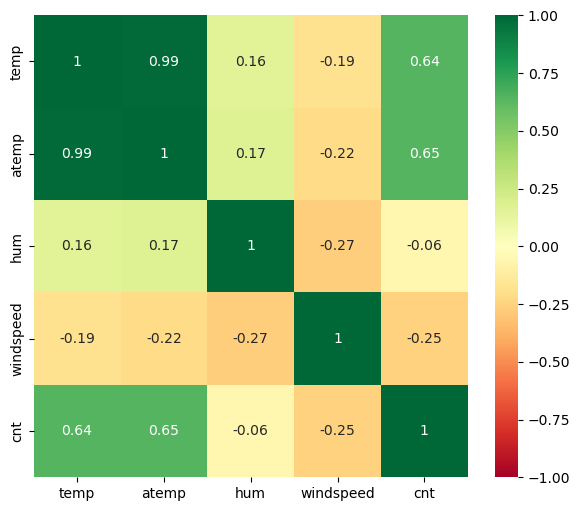

In [222]:
var = ["temp", "atemp", "hum", "windspeed", "cnt"]

plt.figure(figsize=(7,6))
sns.heatmap(df_train[var].corr(), cmap="RdYlGn", annot=True, vmin=-1, vmax=1, center=0)
plt.show()

- `temp` and `atemp` are strongly associated with each other with a high positive correlation, which can lead to a case of multicollinearity
- `temp` and `atemp` variables are strongly associated with `cnt` variable with a positive correlation
- `hum` and `windspeed` variables are weakly associated with `cnt` variable with a negative correlation


### Dividing `df_train` into `X_train` and `y_train`

In [223]:
df_train.head()

yr  holiday  workingday      temp     atemp       hum  windspeed  \
653   1        0           1  0.509887  0.501133  0.575354   0.300794   
576   1        0           1  0.815169  0.766351  0.725633   0.264686   
426   1        0           0  0.442393  0.438975  0.640189   0.255342   
728   1        0           1  0.245101  0.200348  0.498067   0.663106   
482   1        0           0  0.395666  0.391735  0.504508   0.188475   

          cnt  season_spring  season_summer  ...  mnth_Sep  weekday_Monday  \
653  0.864243              0              0  ...         0               0   
576  0.827658              0              0  ...         0               0   
426  0.465255              1              0  ...         0               0   
728  0.204096              1              0  ...         0               1   
482  0.482973              0              1  ...         0               0   

     weekday_Saturday  weekday_Sunday  weekday_Thrusday  weekday_Tuesday  \
653                 0               0                 0                0   
576                 0               0                 0                0   
426                 0               1                 0                0   
728                 0               0                 0                0   
482                 0               1                 0                0   

     weekday_Wednesday  Clear  Light Snow & Rain  Mist & Cloudy  
653                  1      1                  0              0  
576                  1      1                  0              0  
426                  0      0                  0              1  
728                  0      1                  0              0  
482                  0      0                  0              1  

[5 rows x 31 columns]

In [224]:
X_train = df_train.drop("cnt", axis=1)
y_train = df_train["cnt"]

## Step 6 : Model Building

- Using RFE to get the top 15 significant variables
- Building model using statsmodel
- Getting VIF score of variables given to the model to check for multicollinearity

In [225]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [226]:
rfe = RFE(estimator=lr, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [227]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('atemp', False, 4),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 13),
 ('mnth_Dec', False, 2),
 ('mnth_Feb', False, 3),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 12),
 ('mnth_Mar', False, 16),
 ('mnth_May', False, 10),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 14),
 ('mnth_Sep', True, 1),
 ('weekday_Monday', False, 9),
 ('weekday_Saturday', False, 6),
 ('weekday_Sunday', False, 7),
 ('weekday_Thrusday', False, 15),
 ('weekday_Tuesday', False, 8),
 ('weekday_Wednesday', False, 11),
 ('Clear', True, 1),
 ('Light Snow & Rain', True, 1),
 ('Mist & Cloudy', True, 1)]

In [228]:
# storing the variables we got from RFE in a new object 
rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_Jan', 'mnth_Jul', 'mnth_Nov',
       'mnth_Sep', 'Clear', 'Light Snow & Rain', 'Mist & Cloudy'],
      dtype='object')

### Using statsmodels for building Linear Regression model

In [229]:
# creating a new dataframe having only those variables that we got from RFE
X_train_rfe = X_train[rfe_col]
X_train_rfe.head()

yr  holiday      temp       hum  windspeed  season_spring  season_summer  \
653   1        0  0.509887  0.575354   0.300794              0              0   
576   1        0  0.815169  0.725633   0.264686              0              0   
426   1        0  0.442393  0.640189   0.255342              1              0   
728   1        0  0.245101  0.498067   0.663106              1              0   
482   1        0  0.395666  0.504508   0.188475              0              1   

     season_winter  mnth_Jan  mnth_Jul  mnth_Nov  mnth_Sep  Clear  \
653              1         0         0         0         0      1   
576              0         0         1         0         0      1   
426              0         0         0         0         0      0   
728              0         0         0         0         0      1   
482              0         0         0         0         0      0   

     Light Snow & Rain  Mist & Cloudy  
653                  0              0  
576                  0              0  
426                  0              1  
728                  0              0  
482                  0              1

Adding a constant (intercept) because statsmodels by default consists intercept as 0

In [230]:
X_train_sm = sm.add_constant(X_train_rfe)

In [231]:
X_train_sm.head()

const  yr  holiday      temp       hum  windspeed  season_spring  \
653    1.0   1        0  0.509887  0.575354   0.300794              0   
576    1.0   1        0  0.815169  0.725633   0.264686              0   
426    1.0   1        0  0.442393  0.640189   0.255342              1   
728    1.0   1        0  0.245101  0.498067   0.663106              1   
482    1.0   1        0  0.395666  0.504508   0.188475              0   

     season_summer  season_winter  mnth_Jan  mnth_Jul  mnth_Nov  mnth_Sep  \
653              0              1         0         0         0         0   
576              0              0         0         1         0         0   
426              0              0         0         0         0         0   
728              0              0         0         0         0         0   
482              1              0         0         0         0         0   

     Clear  Light Snow & Rain  Mist & Cloudy  
653      1                  0              0  
576      1                  0              0  
426      0                  0              1  
728      1                  0              0  
482      0                  0              1

### Model 1

#### Fitting the 1st model

In [232]:
sm_lr = sm.OLS(y_train,X_train_sm).fit()

In [233]:
sm_lr.params

const                0.154177
yr                   0.230614
holiday             -0.092149
temp                 0.506029
hum                 -0.170753
windspeed           -0.185760
season_spring       -0.056122
season_summer        0.047887
season_winter        0.098888
mnth_Jan            -0.033939
mnth_Jul            -0.056182
mnth_Nov            -0.025251
mnth_Sep             0.079817
Clear                0.149358
Light Snow & Rain   -0.091469
Mist & Cloudy        0.096288
dtype: float64

In [234]:
print(sm_lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     191.3
Date:                Tue, 28 Nov 2023   Prob (F-statistic):          1.49e-189
Time:                        11:46:29   Log-Likelihood:                 512.54
No. Observations:                 511   AIC:                            -995.1
Df Residuals:                     496   BIC:                            -931.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1542      0.02

#### Checking VIF Score

In [235]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
12              Clear  49.16
14      Mist & Cloudy  32.49
5       season_spring   5.20
13  Light Snow & Rain   4.16
2                temp   3.97
7       season_winter   3.77
6       season_summer   2.68
3                 hum   1.90
8            mnth_Jan   1.57
9            mnth_Jul   1.49
10           mnth_Nov   1.48
11           mnth_Sep   1.31
4           windspeed   1.21
0                  yr   1.04
1             holiday   1.03

#### Dropping `mnth_Nov` because it has high p-value

In [236]:
X = X_train_rfe.drop("mnth_Nov", axis=1)

### MODEL 2

In [237]:
X_train_sm = sm.add_constant(X)

In [238]:
sm_lr = sm.OLS(y_train,X_train_sm).fit()

print(sm_lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.4
Date:                Tue, 28 Nov 2023   Prob (F-statistic):          2.94e-190
Time:                        11:46:29   Log-Likelihood:                 511.44
No. Observations:                 511   AIC:                            -994.9
Df Residuals:                     497   BIC:                            -935.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1490      0.02

In [239]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
11              Clear  48.16
13      Mist & Cloudy  31.97
5       season_spring   5.09
12  Light Snow & Rain   4.13
2                temp   3.89
7       season_winter   3.60
6       season_summer   2.65
3                 hum   1.90
8            mnth_Jan   1.57
9            mnth_Jul   1.49
10           mnth_Sep   1.30
4           windspeed   1.21
0                  yr   1.04
1             holiday   1.02

#### Dropping `mnth_Jan` because it has high p-value

In [240]:
X = X.drop("mnth_Jan", axis=1)

### Model 3

In [241]:
X_train_sm = sm.add_constant(X)

In [242]:
sm_lr = sm.OLS(y_train,X_train_sm).fit()

print(sm_lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     221.1
Date:                Tue, 28 Nov 2023   Prob (F-statistic):          1.12e-190
Time:                        11:46:29   Log-Likelihood:                 509.63
No. Observations:                 511   AIC:                            -993.3
Df Residuals:                     498   BIC:                            -938.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1409      0.02

In [243]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
10              Clear  46.67
12      Mist & Cloudy  31.14
5       season_spring   5.02
11  Light Snow & Rain   4.08
2                temp   3.61
7       season_winter   3.49
6       season_summer   2.62
3                 hum   1.89
8            mnth_Jul   1.48
9            mnth_Sep   1.30
4           windspeed   1.19
0                  yr   1.03
1             holiday   1.02

#### Dropping `Clear` because it has high VIF Score of more than 5.

In [244]:
X = X.drop("Clear", axis=1)

### Model 4

In [245]:
X_train_sm = sm.add_constant(X)

In [246]:
sm_lr = sm.OLS(y_train,X_train_sm).fit()

print(sm_lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     221.1
Date:                Tue, 28 Nov 2023   Prob (F-statistic):          1.12e-190
Time:                        11:46:29   Log-Likelihood:                 509.63
No. Observations:                 511   AIC:                            -993.3
Df Residuals:                     498   BIC:                            -938.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2846      0.03

In [247]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
3                 hum  28.05
2                temp  16.05
4           windspeed   4.66
5       season_spring   4.01
7       season_winter   3.35
6       season_summer   2.79
11      Mist & Cloudy   2.28
0                  yr   2.08
8            mnth_Jul   1.58
9            mnth_Sep   1.38
10  Light Snow & Rain   1.24
1             holiday   1.04

#### Dropping `hum` because it has high VIF Score of more than 5

In [248]:
X = X.drop("hum", axis=1)

### Model 5

In [249]:
X_train_sm = sm.add_constant(X)

In [250]:
sm_lr = sm.OLS(y_train,X_train_sm).fit()

print(sm_lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.0
Date:                Tue, 28 Nov 2023   Prob (F-statistic):          2.09e-187
Time:                        11:46:29   Log-Likelihood:                 499.05
No. Observations:                 511   AIC:                            -974.1
Df Residuals:                     499   BIC:                            -923.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1988      0.03

In [251]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2                temp  5.10
3           windspeed  4.61
5       season_summer  2.23
4       season_spring  2.08
0                  yr  2.07
6       season_winter  1.79
7            mnth_Jul  1.58
10      Mist & Cloudy  1.55
8            mnth_Sep  1.34
9   Light Snow & Rain  1.08
1             holiday  1.04

#### Dropping `mnth_Jul` because it has high p-value

-  To avoid data loss we are not dropping `temp` as it is an important variable in predicting the output (`cnt`) in general.
-  Therefore, we drop `mnth_Jul` because it has high p-value

In [252]:
X = X.drop("mnth_Jul", axis=1)

### Model 6

In [253]:
X_train_sm = sm.add_constant(X)

In [254]:
sm_lr = sm.OLS(y_train,X_train_sm).fit()

print(sm_lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.8
Date:                Tue, 28 Nov 2023   Prob (F-statistic):          6.20e-187
Time:                        11:46:29   Log-Likelihood:                 495.07
No. Observations:                 511   AIC:                            -968.1
Df Residuals:                     500   BIC:                            -921.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1902      0.03

In [255]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
3          windspeed  4.60
2               temp  3.84
0                 yr  2.07
4      season_spring  1.99
5      season_summer  1.90
6      season_winter  1.63
9      Mist & Cloudy  1.55
7           mnth_Sep  1.23
8  Light Snow & Rain  1.08
1            holiday  1.04

- The VIF scores of all the variables are below 5 and the p values of all the coefficients are 0 or close to 0
- This is our final model

## Step 7 : Residual Analysis

- Predicting on the Training dataset
- Finding the Residuals
- Checking the error terms (Residuals) distribution
- Checking for multicollinearity

#### Predicting on the training dataset

In [256]:
y_train_pred = sm_lr.predict(X_train_sm)

#### Finding the Residual

In [257]:
res = y_train - y_train_pred

#### Plotting the error terms (Residuals) distribution

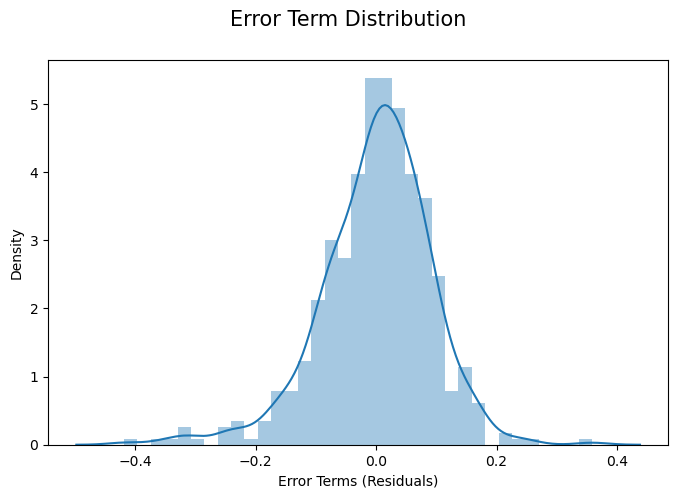

In [258]:
fig = plt.figure(figsize=(8,5))
sns.distplot(res, bins = 35)
fig.suptitle('Error Term Distribution', fontsize = 15)                  
plt.xlabel('Error Terms (Residuals)')
plt.show()

- The error terms are normally distributed and the mean is centered around 0 this means that the model is a good fit and satisfies the condition of a linear regression model

#### Checking for Multicollinearity

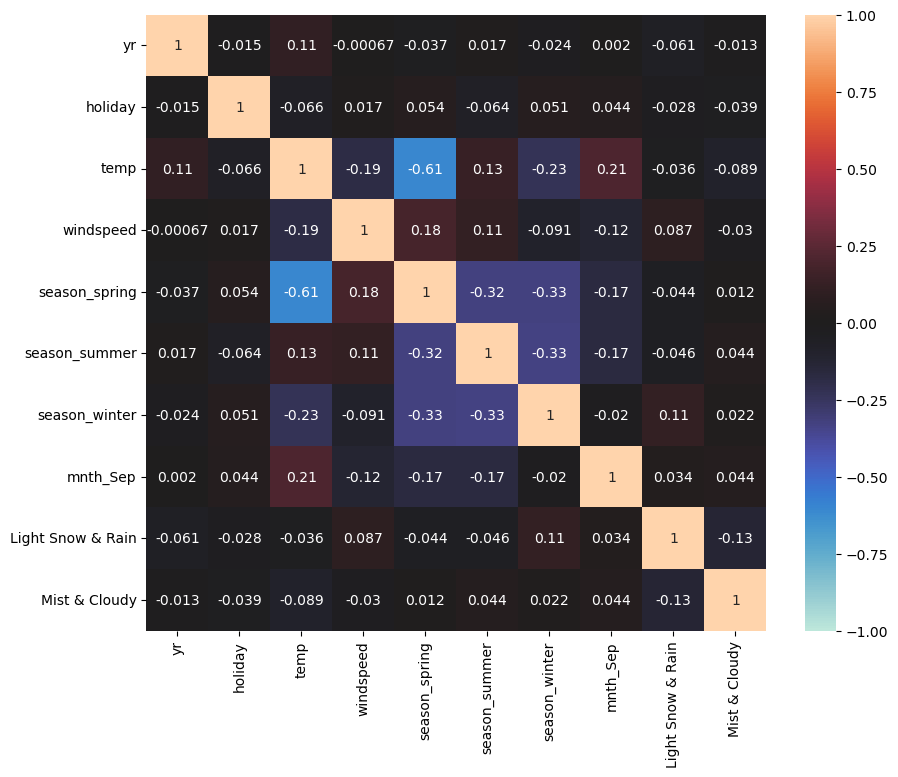

In [259]:
plt.figure(figsize=(10,8))
sns.heatmap(X.corr(), annot=True, vmin=-1, vmax=1, center=0)
plt.show()

* There are no highly correlated independant variables

## Step 8 : Predicting on Test dataset

- Scaling the test dataset by transforming it
- Dividing into `X_test` and `y_test`
- Removing columns so as to keep only the final model (Model 6) columns 
- Adding constant to `X_test`
- Predicting on `X_test`

#### Scaling the test set

In [260]:
num = ["temp", "atemp", "hum", "windspeed", "cnt"]

In [261]:
# we only transform the test set

df_test[num] = scaler.transform(df_test[num])

In [262]:
df_test.head()

yr  holiday  workingday      temp     atemp       hum  windspeed  \
184   0        1           0  0.831783  0.769660  0.657364   0.084219   
535   1        0           1  0.901354  0.842587  0.610133   0.153728   
299   0        0           0  0.511964  0.496145  0.837699   0.334206   
221   0        0           1  0.881625  0.795343  0.437098   0.339570   
152   0        0           0  0.817246  0.741471  0.314298   0.537414   

          cnt  season_spring  season_summer  ...  mnth_Sep  weekday_Monday  \
184  0.692706              0              0  ...         0               0   
535  0.712034              0              1  ...         0               0   
299  0.303382              0              0  ...         0               0   
221  0.547400              0              0  ...         0               0   
152  0.569029              0              1  ...         0               0   

     weekday_Saturday  weekday_Sunday  weekday_Thrusday  weekday_Tuesday  \
184                 0               0                 0                0   
535                 0               0                 1                0   
299                 1               0                 0                0   
221                 0               0                 0                0   
152                 1               0                 0                0   

     weekday_Wednesday  Clear  Light Snow & Rain  Mist & Cloudy  
184                  1      0                  0              1  
535                  0      1                  0              0  
299                  0      0                  0              1  
221                  0      1                  0              0  
152                  0      1                  0              0  

[5 rows x 31 columns]

In [263]:
df_test.describe()

yr     holiday  workingday        temp       atemp         hum  \
count  219.000000  219.000000  219.000000  219.000000  219.000000  219.000000   
mean     0.479452    0.036530    0.639269    0.558941    0.532991    0.638508   
std      0.500722    0.188034    0.481313    0.233698    0.217888    0.148974   
min      0.000000    0.000000    0.000000    0.046591    0.025950    0.261915   
25%      0.000000    0.000000    0.000000    0.354650    0.344751    0.527265   
50%      0.000000    0.000000    1.000000    0.558691    0.549198    0.627737   
75%      1.000000    0.000000    1.000000    0.759096    0.714132    0.743928   
max      1.000000    1.000000    1.000000    0.984424    0.980934    1.002146   

        windspeed         cnt  season_spring  season_summer  ...    mnth_Sep  \
count  219.000000  219.000000     219.000000     219.000000  ...  219.000000   
mean     0.313350    0.520592       0.255708       0.264840  ...    0.086758   
std      0.159947    0.218435       0.437258       0.442259  ...    0.282125   
min     -0.042808    0.048205       0.000000       0.000000  ...    0.000000   
25%      0.198517    0.377531       0.000000       0.000000  ...    0.000000   
50%      0.299459    0.524275       0.000000       0.000000  ...    0.000000   
75%      0.403048    0.672745       1.000000       1.000000  ...    0.000000   
max      0.807474    0.963300       1.000000       1.000000  ...    1.000000   

       weekday_Monday  weekday_Saturday  weekday_Sunday  weekday_Thrusday  \
count      219.000000        219.000000      219.000000        219.000000   
mean         0.118721          0.173516        0.155251          0.141553   
std          0.324202          0.379560        0.362974          0.349389   
min          0.000000          0.000000        0.000000          0.000000   
25%          0.000000          0.000000        0.000000          0.000000   
50%          0.000000          0.000000        0.000000          0.000000   
75%          0.000000          0.000000        0.000000          0.000000   
max          1.000000          1.000000        1.000000          1.000000   

       weekday_Tuesday  weekday_Wednesday       Clear  Light Snow & Rain  \
count       219.000000         219.000000  219.000000         219.000000   
mean          0.123288           0.155251    0.652968           0.027397   
std           0.329520           0.362974    0.477117           0.163612   
min           0.000000           0.000000    0.000000           0.000000   
25%           0.000000           0.000000    0.000000           0.000000   
50%           0.000000           0.000000    1.000000           0.000000   
75%           0.000000           0.000000    1.000000           0.000000   
max           1.000000           1.000000    1.000000           1.000000   

       Mist & Cloudy  
count     219.000000  
mean        0.319635  
std         0.467403  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         1.000000  
max         1.000000  

[8 rows x 31 columns]

#### Dividing the Test dataset into `X_test` and `y_test`

In [264]:
X_test = df_test.drop("cnt", axis=1)
y_test = df_test["cnt"]

#### Keeping those variables in `X_test` dataframe that we finalised from the final model (Model 6)

In [265]:
test_col = X.columns
X_test = X_test[test_col]

#### Adding a constant (intercept) to `X_test` dataframe

In [266]:
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

const  yr  holiday      temp  windspeed  season_spring  season_summer  \
184    1.0   0        1  0.831783   0.084219              0              0   
535    1.0   1        0  0.901354   0.153728              0              1   
299    1.0   0        0  0.511964   0.334206              0              0   
221    1.0   0        0  0.881625   0.339570              0              0   
152    1.0   0        0  0.817246   0.537414              0              1   

     season_winter  mnth_Sep  Light Snow & Rain  Mist & Cloudy  
184              0         0                  0              1  
535              0         0                  0              0  
299              1         0                  0              1  
221              0         0                  0              0  
152              0         0                  0              0

#### Predicting output (`y_pred`) on `X_test_sm` 

In [267]:
y_pred = sm_lr.predict(X_test_sm)

## Step 9: Model Evaluation

- Plotting actual values (y_test) against predicted values (y_pred) to see the trend
- Residual Analysis on the test dataset

#### Plotting graph for actual test set values (`y_test`)  and predicted values (`y_pred`).

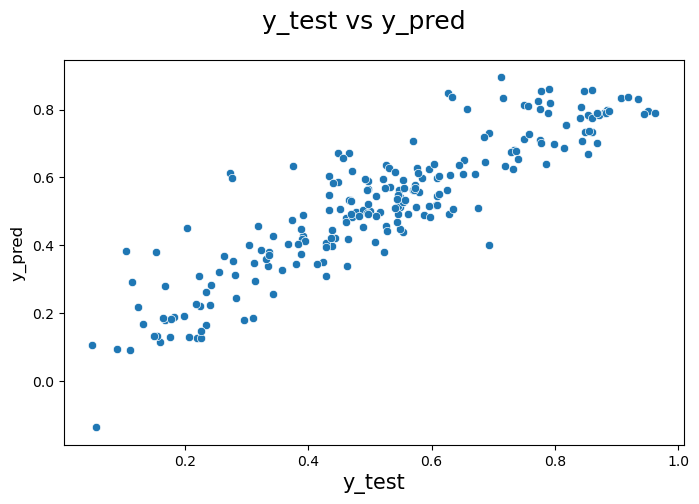

In [268]:
fig = plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 18)               
plt.xlabel('y_test', fontsize = 15)                          
plt.ylabel('y_pred', fontsize = 12)
plt.show()

### Residual Analysis on the test dataset

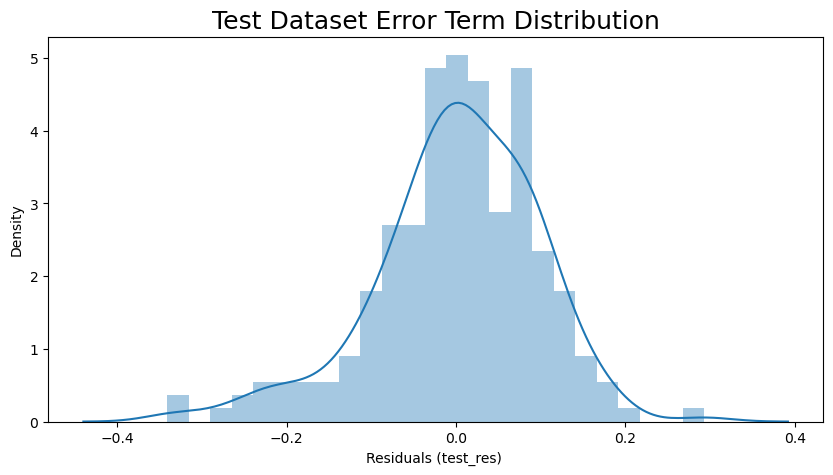

In [269]:
test_res = y_test - y_pred
fig = plt.figure(figsize=(10,5))
sns.distplot(test_res, bins=25)
plt.title("Test Dataset Error Term Distribution", fontsize=18)
plt.xlabel("Residuals (test_res) ")
plt.show()

- There error terms are normally distributed and mean is centered around 0

## Step 10 : $R^2$ test

In [270]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.803655907770052

In [271]:
r2 = r2_score(y_test, y_pred)

In [272]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7942


### Mean Squared Error test

In [273]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mse

0.009325521335995153

### Root Mean Squared Error test

In [274]:
rmse = np.sqrt(mse)
rmse

0.09656873891687286

## Model 6 (Final Model) Summary 

### $R^2$ values of the model

* Training Dataset $R^2$ = 0.833
* Training Dataset Adjusted $R^2$ = 0.829

<br>

* Test Dataset $R^2$ = 0.803655907770052
* Test Dataset Adjusted $R^2$ = 0.7942


### Model Coefficients

### `sm_lr` model (Model 6 [ Final Model ] ) variables and their coefficients**


    - const                 0.1902     
    - yr                    0.2347      
    - holiday              -0.0968      
    - temp                  0.4785     
    - windspeed            -0.1480 
    - season_spring        -0.0550 
    - season_summer         0.0622 
    - season_winter         0.0960 
    - mnth_Sep              0.0908 
    - Light Snow & Rain    -0.2857 
    - Mist & Cloudy        -0.0792


<br>

### Inference of the final model (Model 6) with respect to the coefficiencts

- All of the variables of the final model have a p-value 0 or almost equal to 0. 
- This means that coefficients and variables of the final model are significant.
- Therefore, we can **reject the NULL Hypothesis** which says that our model coefficients are insignificant (**B0 != 0**). 


### F-statistic     

#### F-statistic** : 248.8

* The F-statistic value is higher.


### Prob (F-statistic)

#### Prob (F-statistic)** : 6.20e-187
    
* The probability of F-statistic is a value very close to 0. 
* This proves that our overall model is significant


### Final Model Equation

#### The final model (Model 6) equation**:

- output (`cnt`)** = 0.1902 + (`yr` × 0.2347) - (`holiday` × 0.0968) + (`temp` × 0.4785) − (`windspeed` × 0.1480) - (`season_spring` × 0.0550) + (`season_summer` × 0.0622) + (`season_winter` × 0.0960) + (`mnth_Sep` × 0.0908) - (`Light Snow & Rain` × 0.2857) − (`Mist & Cloudy` × 0.0792)

---